In [85]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [86]:
pd.set_option('display.max_columns',100)

In [87]:
df=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [88]:
df.head().iloc[:,:20]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632


# Find correlations between columns 

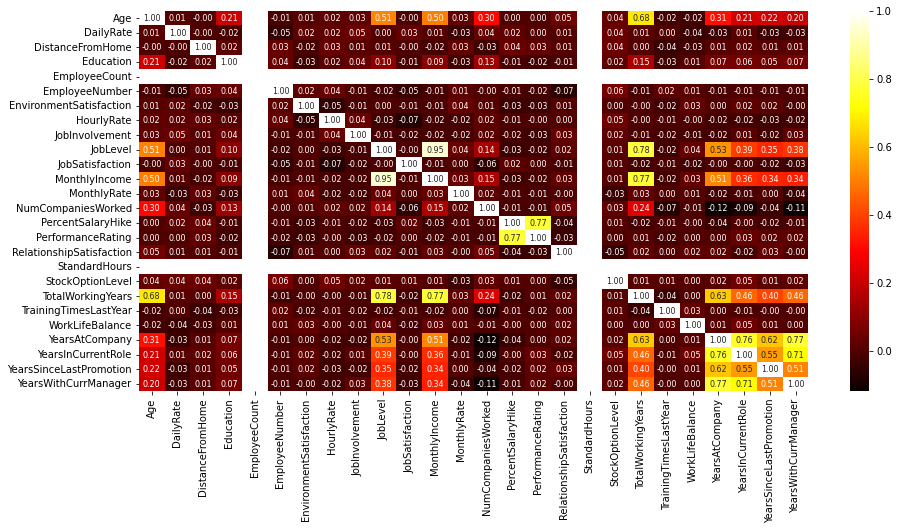

In [89]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='hot',fmt='.2f',annot_kws={'fontsize':8})
plt.show()

# Which job roles have highest salaries

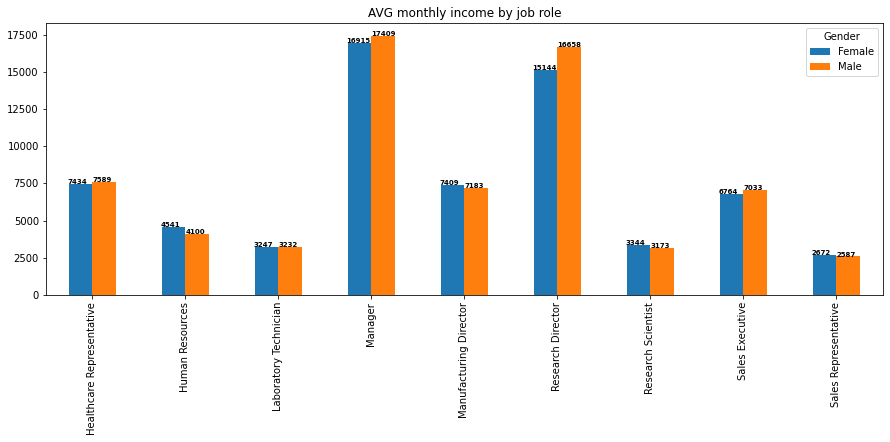

In [90]:
grouped=df.groupby(['JobRole','Gender'])['MonthlyIncome'].mean().reset_index().sort_values('MonthlyIncome',ascending=False)
pivoted=grouped.pivot('JobRole','Gender','MonthlyIncome').reset_index()

ax=pivoted.plot(kind='bar',x='JobRole',y=['Female','Male'],xlabel='',figsize=(15,5))
plt.title('AVG monthly income by job role')
#ax.bar_label(ax.containers[0], label_type='edge',fmt='%.f')
#ax.bar_label(ax.containers[1], label_type='edge',fmt='%.f')

def value_labels_Female(y):
    for i in range(len(y)):
        plt.text(i-0.27,y.iloc[i],round(y.iloc[i]),size=7,fontweight='bold')
value_labels_Female(pivoted.Female)

def value_labels_Male(y):
    for i in range(len(y)):
        plt.text(i,y.iloc[i],round(y.iloc[i]),size=7,fontweight='bold')
value_labels_Male(pivoted.Male)

plt.show()

# Salary distribution by gender and jobrole (Boxplot)

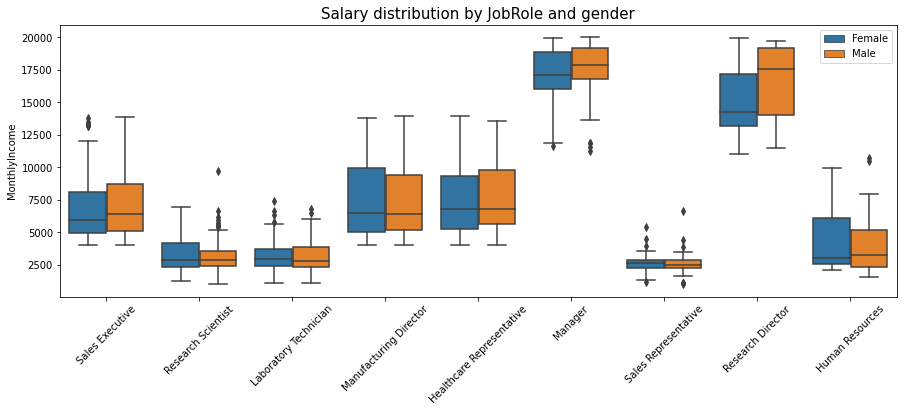

In [91]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df.MonthlyIncome,x=df.JobRole,hue=df.Gender)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.xlabel('')
plt.title('Salary distribution by JobRole and gender',size=15)
plt.show()

# Salary distribution by age

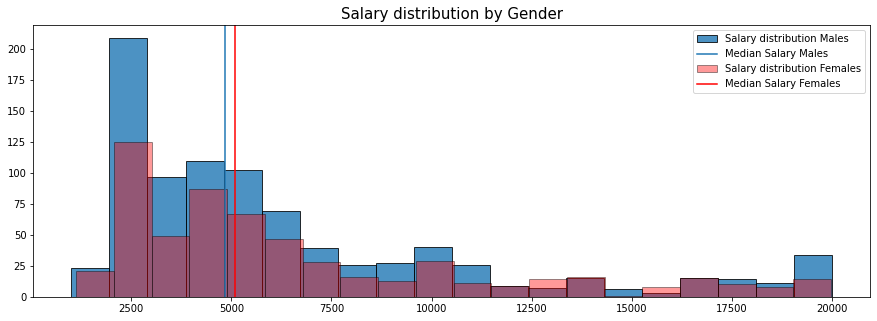

In [92]:
plt.figure(figsize=(15,5))
plt.hist(Males.MonthlyIncome,bins=20,ec="k",alpha=0.8,label="Salary distribution Males")
plt.axvline(Males.MonthlyIncome.median(),label="Median Salary Males")

plt.hist(Females.MonthlyIncome,color="r",bins=20,ec="k",alpha=0.4,label="Salary distribution Females")
plt.axvline(Females.MonthlyIncome.median(),label="Median Salary Females",color="r")

plt.title('Salary distribution by Gender',size=15)
plt.legend()
plt.show()

# Age and Salary correlation 

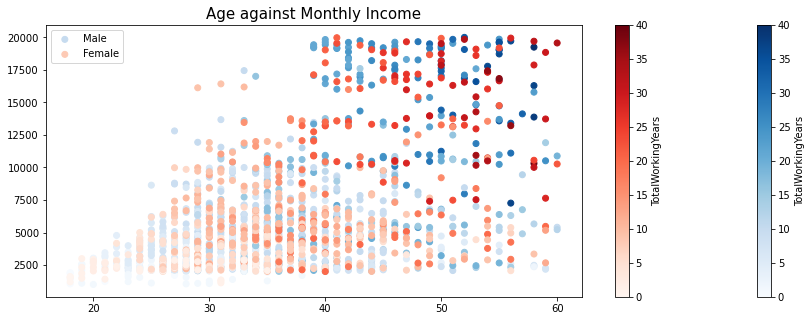

In [97]:
plt.figure(figsize=(15,5))
Males=df[df.Gender=="Male"]
Females=df[df.Gender=="Female"]
plt.scatter(Males.Age,Males.MonthlyIncome,label="Male",c=Males.TotalWorkingYears,cmap="Blues")
plt.colorbar().set_label("TotalWorkingYears")
plt.scatter(Females.Age,Females.MonthlyIncome,label='Female',c=Females.TotalWorkingYears,cmap="Reds")
plt.colorbar().set_label("TotalWorkingYears")
plt.title("Age against Monthly Income",size=15)
plt.legend()
plt.show()

In [94]:
# For both Males and Females salary raises when they get older and more experienced at work

# Age distribution by JobRole and gender (Violinplot) 

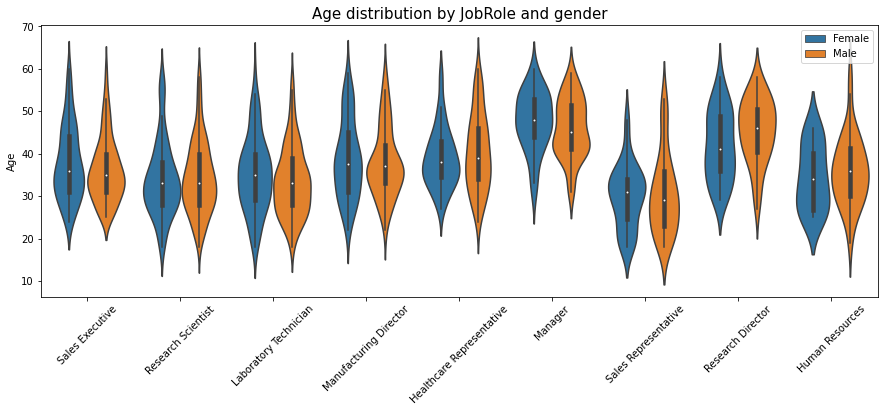

In [95]:
plt.figure(figsize=(15,5))
sns.violinplot(y=df.Age,x=df.JobRole,hue=df.Gender)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.xlabel('')
plt.title('Age distribution by JobRole and gender',size=15)
plt.show()